In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import collections
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [ ]:
from sklearn import svm, metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from keras.datasets import mnist
(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


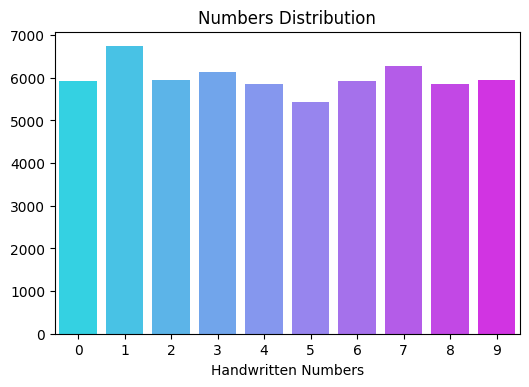

In [ ]:
from keras.datasets import mnist;

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()
import seaborn as sns
import collections
import matplotlib.pyplot as plt

value_count_training = collections.Counter(training_dataset_y)

fig, ax0 = plt.subplots(1, 1, dpi=100)
ax = sns.barplot(list(value_count_training.keys()), list(value_count_training.values()), palette='cool')
ax.set_xlabel('Handwritten Numbers')
ax.set_title("Numbers Distribution")
plt.show();
training_dataset_x = training_dataset_x.reshape(-1, 28 * 28) 
test_dataset_x = test_dataset_x.reshape(-1, 28 * 28)

In [ ]:
#one hot encoding
from keras.utils import to_categorical

training_dataset_y = to_categorical(training_dataset_y)
test_dataset_y = to_categorical(test_dataset_y)

In [ ]:
training_dataset_x = training_dataset_x / 255
test_dataset_x = test_dataset_x / 255

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1)).fit(training_dataset_x)
X_train = scaler.transform(training_dataset_x)
X_test = scaler.transform(test_dataset_x)

In [ ]:
#svm w RBF kernel
rbf_svm = svm.SVC(kernel='rbf')
rbf_svm.fit(training_dataset_x, y_train)

SVC()

In [ ]:
y_pred = rbf_svm.predict(test_dataset_x)

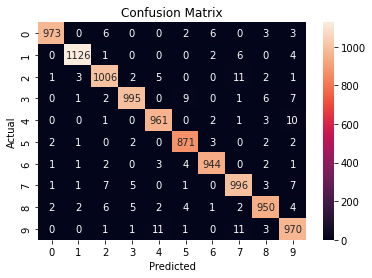

In [ ]:
#compute the confusion matrix

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#the accuracy score of the model

accuracy_score(y_pred, y_test)

0.9792

In [ ]:
test = pd.read_csv(r"mnist_test.csv")

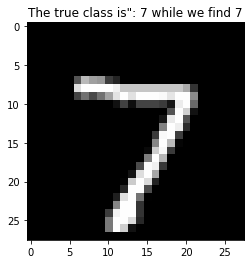

In [ ]:
#have a look at a case that the model correctly classified

for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        instance = i
        break

plt.imshow(np.reshape(np.array(test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i while we find %i' % (y_test[instance], y_pred[instance]))
plt.show()

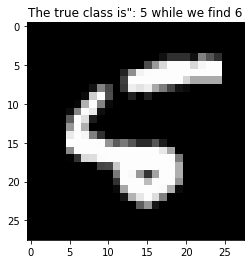

In [ ]:
#have a look at a case that the model misclassified

for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        instance = i
        break
         
plt.imshow(np.reshape(np.array(test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i while we find %i' % (y_test[instance], y_pred[instance]))
plt.show()

In [ ]:
# #decision tree
# # Standard Libraries
# import os
# import numpy as np 
# import pandas as pd 
# import random as rn

# # Visualization libraries
# import pydotplus
# import matplotlib
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style({"axes.facecolor": ".95"})

# # Modeling and Machine Learning
# from IPython.display import Image 
# from sklearn.manifold import TSNE
# from sklearn.metrics import accuracy_score
# from sklearn.externals.six import StringIO  
# from sklearn.decomposition import TruncatedSVD
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# # Seed for reproducability
# seed = 1234
# np.random.seed(seed)
# rn.seed(seed)
# os.environ['PYTHONHASHSEED'] = str(seed)

In [ ]:
test.shape

(1155, 785)

In [ ]:
training_dataset_x.shape

(60000, 784)

In [ ]:
test_dataset_x.shape

(10000, 784)

In [ ]:
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score
#To show graphs within the notebook
%matplotlib inline 

In [ ]:
#training random Forest
rf=RandomForestClassifier(n_estimators=100)
rf.fit(training_dataset_x,training_dataset_y)

RandomForestClassifier()

In [ ]:
pred=rf.predict(test_dataset_x)
print ("Classification Report")
print(classification_report(test_dataset_y, pred))


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       1.00      0.98      0.99      1135
           2       0.99      0.89      0.94      1032
           3       1.00      0.87      0.93      1010
           4       0.99      0.89      0.94       982
           5       1.00      0.86      0.92       892
           6       1.00      0.93      0.96       958
           7       0.99      0.91      0.95      1028
           8       0.99      0.83      0.90       974
           9       0.99      0.89      0.93      1009

   micro avg       0.99      0.90      0.95     10000
   macro avg       0.99      0.90      0.94     10000
weighted avg       0.99      0.90      0.95     10000
 samples avg       0.90      0.90      0.90     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#evaluating
score = accuracy_score(test_dataset_y,pred)
score

0.9016

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier()
dtree.fit(training_dataset_x , training_dataset_y)
from sklearn.metrics import confusion_matrix
cmdtree = confusion_matrix(test_dataset_y,ypred)
cmdtree ,dtree.score(xtest , ytest)


In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

6


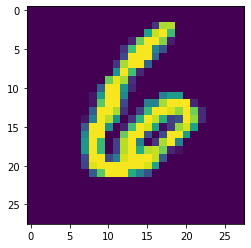

In [ ]:
plt.imshow(X_train[13])
print(y_train[13])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.optimizers.optimizer_v1 import Optimizer
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 20, verbose = 1, validation_split = 0.2)

Epoch 1/20
750/750 [==============================] - 3s 5ms/step - loss: 3.8876e-04 - accuracy: 1.0000 - val_loss: 0.1116 - val_accuracy: 0.9800
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 2.6678e-04 - accuracy: 1.0000 - val_loss: 0.1109 - val_accuracy: 0.9803
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.1368 - val_accuracy: 0.9746
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0064 - accuracy: 0.9977 - val_loss: 0.1201 - val_accuracy: 0.9784
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 8.6388e-04 - accuracy: 0.9999 - val_loss: 0.1183 - val_accuracy: 0.9791
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 2.8014e-04 - accuracy: 1.0000 - val_loss: 0.1179 - val_accuracy: 0.9788
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 1.8309e-04 - accuracy: 1.0000 - val_loss: 0.1174 - val_acc

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 0.9802


[0.09706155210733414, 0.9801999926567078]

In [ ]:
model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


array([[8.4027871e-12, 1.0753342e-14, 1.3858626e-09, ..., 9.9999911e-01,
        1.8712568e-12, 1.7032361e-09],
       [2.4801946e-13, 5.2850720e-07, 9.9999946e-01, ..., 5.5123515e-25,
        5.0470717e-15, 4.7903310e-24],
       [2.9631351e-09, 9.9980760e-01, 6.0754846e-05, ..., 6.0438306e-06,
        1.2380663e-04, 1.9876044e-11],
       ...,
       [3.4321792e-24, 1.7199549e-21, 4.5296972e-21, ..., 4.9965343e-13,
        3.3807295e-12, 1.6504157e-09],
       [1.5181428e-23, 1.1706595e-20, 1.3517471e-25, ..., 1.0059046e-20,
        6.4465430e-12, 1.3787005e-20],
       [3.8895237e-17, 2.4590349e-22, 7.4750353e-17, ..., 9.2498163e-26,
        1.6421743e-15, 6.3002163e-22]], dtype=float32)

In [ ]:

predictions = (model.predict(X_test) > 0.5).astype("int32")

313/313 [==============================] - 0s 1ms/step


In [ ]:
predictions

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

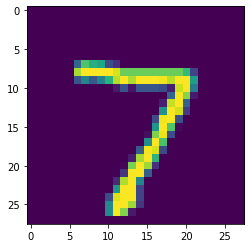

In [ ]:
plt.imshow(X_test[0])

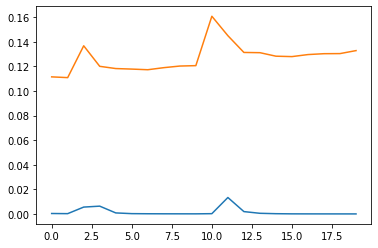

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

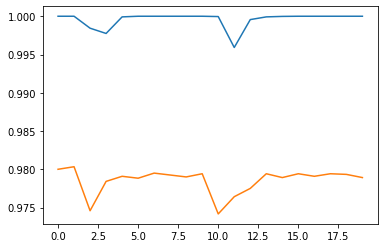

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])